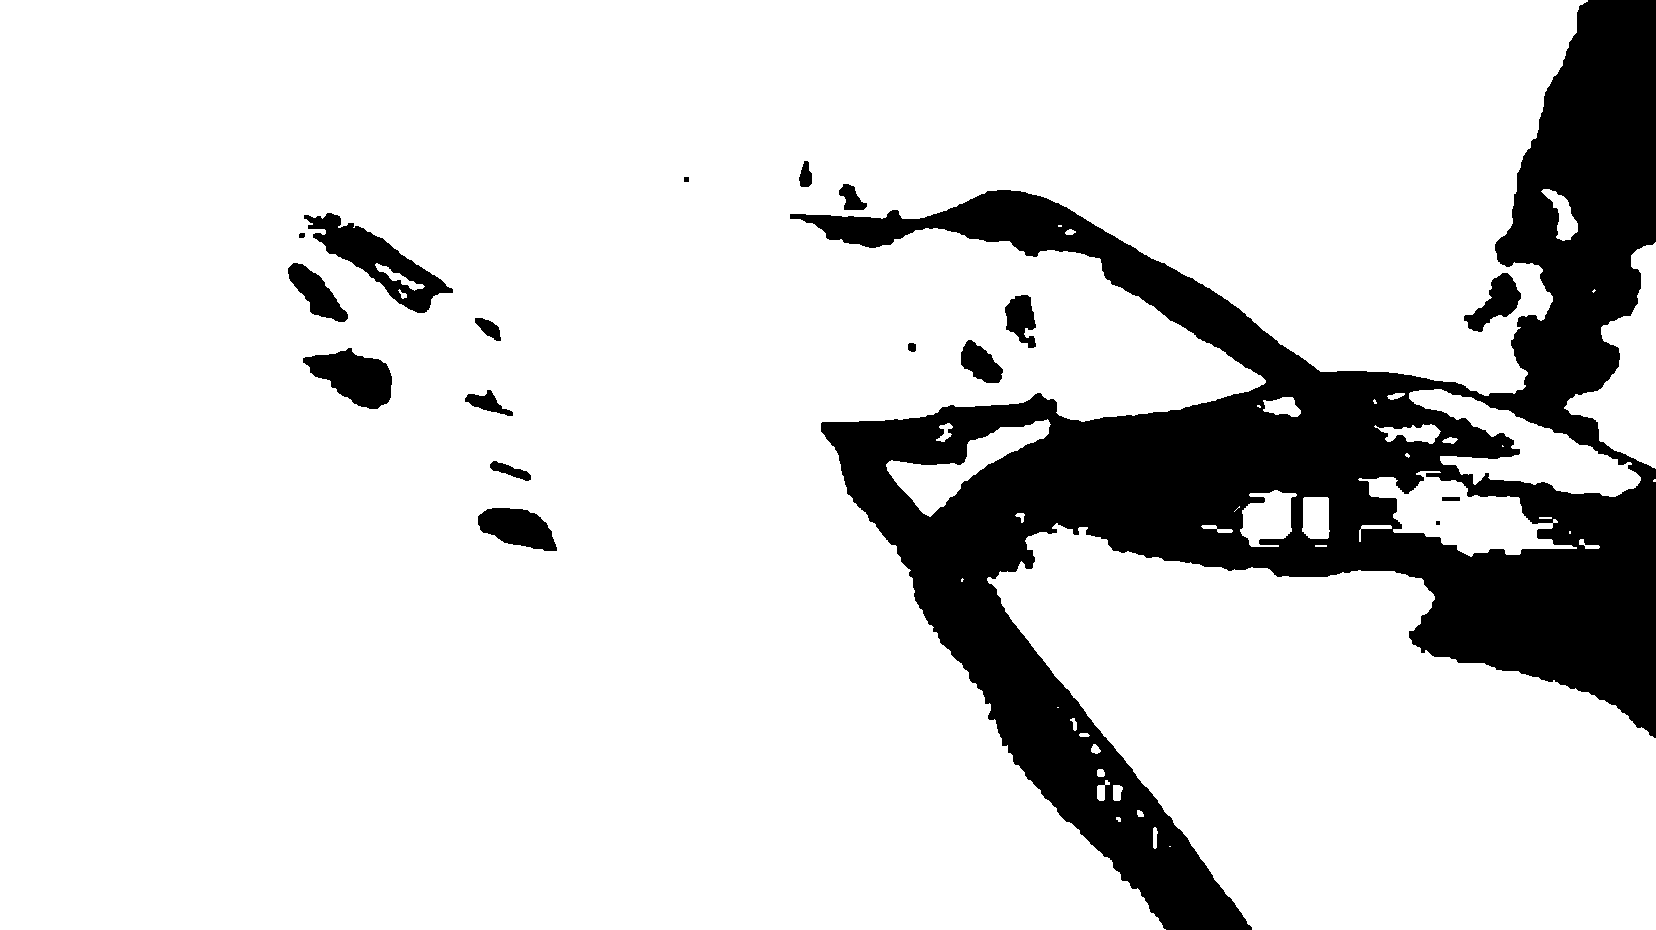

In [1]:
import cv2
import numpy as np

from IPython.display import display
from PIL import Image

# Open a simple image
img = cv2.imread("images/7.jpg")

# converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# skin color range for hsv color space
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17, 170, 255))
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255, 180, 135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# merge skin detection (YCbCr and hsv)
global_mask = cv2.bitwise_and(YCrCb_mask, HSV_mask)
global_mask = cv2.medianBlur(global_mask, 3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4, 4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result = cv2.bitwise_not(global_mask)

img_rgb = cv2.cvtColor(global_result, cv2.COLOR_BGR2RGB)

display(Image.fromarray(img_rgb))

In [4]:
import cv2
import numpy as np


def detect_skin(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define skin color range in HSV
    lower_skin = np.array([0, 30, 60], dtype=np.uint8)
    upper_skin = np.array([20, 150, 255], dtype=np.uint8)

    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    skin_ratio = (np.sum(mask > 0) / mask.size) * 100  # Percentage of skin area

    return skin_ratio > 40  # Flag if > 40% of image is skin

In [5]:
print(detect_skin("images/8.jpg"))  # True if excessive skin is detected

False


In [7]:
print(detect_skin("images/6.jpg"))  # True if excessive skin is detected

False
